In [1]:
#initial euclidean distance
import pandas as pd
import numpy as np
arr=[[0,0.67,0.18],[0.96,0.20,0.19],[0,0.11,0.11],[0,0.15,0.16]]
final=[]
initial=[]
for i in range(0,4):
    l=[]
    for j in range(0,4):
        euc=np.sqrt(((arr[i][0]-arr[j][0])**2)+((arr[i][1]-arr[j][1])**2)+((arr[i][2]-arr[j][2])**2))
        l.append(euc)
    final.append(l)
df=pd.DataFrame(list(zip(final[0],final[1],final[2],final[3])))
df=df.rename(columns={0:'A',1:'B',2:'C',3:'D'}, index={0:'A',1:'B',2:'C',3:'D'})
n=4
print('EUCLIDEAN DISTANCE')
print(df)
initial=final

EUCLIDEAN DISTANCE
          A         B         C         D
A  0.000000  1.068925  0.564358  0.520384
B  1.068925  0.000000  0.967523  0.961769
C  0.564358  0.967523  0.000000  0.064031
D  0.520384  0.961769  0.064031  0.000000


In [2]:
cluster=[]
print("COMPLETE LINKAGE")
while n>1:
    m=100
    for i in final:
        for j in i:
            if j!=0 and j<m:
                m=j

#complete linkage
    x=0
    y=0
    for i in range(n):
        for j in range(n):
            if final[i][j]==m:
                x=i
                y=j
                
                break
    new=[]
    final1=[]
    for i in range(n):
        a=[]
        for j in range(n):
            if j!=min(x,y):
                a.append(final[i][j])
            else:
                a.append(max(final[x][i],final[y][j]))
        final1.append(a)
    for i in range(n):
        final1[i][i]=0.0
    final=final1
    df=pd.DataFrame(list(final))
    
    print(df)
    print("\n")
    n-=1
    cluster.append(str(x)+str(y))

COMPLETE LINKAGE
          0         1         2         3
0  0.000000  1.068925  0.520384  0.520384
1  1.068925  0.000000  0.961769  0.961769
2  0.564358  0.967523  0.000000  0.064031
3  0.520384  0.961769  0.000000  0.000000


          0         1         2
0  0.000000  1.068925  0.520384
1  1.068925  0.000000  0.961769
2  0.520384  0.967523  0.000000


          0         1
0  0.000000  1.068925
1  1.068925  0.000000




In [3]:
print("AVERAGE LINKAGE")
final=initial
n=4
while n>1:
    m=100
    for i in final:
        for j in i:
            if j!=0 and j<m:
                m=j
    cluster=[]
#complete linkage
    x=0
    y=0
    for i in range(n):
        for j in range(n):
            if final[i][j]==m:
                x=i
                y=j
                break
    final1=[]
    for i in range(n):
        a=[]
        for j in range(n):
            if j!=min(x,y):
                a.append(final[i][j])
            else:
                a.append(((max(final[x][i],final[y][j]))+(min(final[x][i],final[y][j])))/2)
        final1.append(a)
    final=final1
    df=pd.DataFrame(list(final))
    print(df)
    print("\n")
    n-=1

AVERAGE LINKAGE
          0         1         2         3
0  0.000000  1.068925  0.260192  0.520384
1  1.068925  0.000000  0.480885  0.961769
2  0.564358  0.967523  0.032016  0.064031
3  0.520384  0.961769  0.000000  0.000000


          0         1         2
0  0.000000  1.068925  0.298187
1  1.068925  0.000000  0.499769
2  0.564358  0.967523  0.032016


          0         1
0  0.000000  1.068925
1  0.534462  0.000000




D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


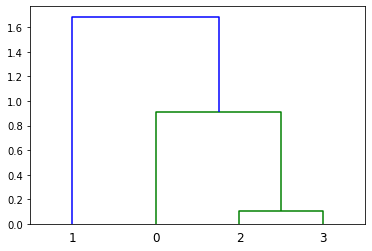

In [67]:
#dendogram for average linkage
import scipy.cluster.hierarchy as shc

dend2 = shc.dendrogram(shc.linkage(initial, method='average'))

In [72]:
#clusters formed at the end of each level for average linkage
l1=[[2,3],[0,[2,3]],[1,[0,[2,3]]]]
l2=[0.1,0.9,1.7]
df1=pd.DataFrame(list(zip(l1,l2)))
print('For Average Linkage')
df1=df1.rename(columns={0:'Clusters',1:'Value'})
print(df1)


For Average Linkage
           Clusters  Value
0            [2, 3]    0.1
1       [0, [2, 3]]    0.9
2  [1, [0, [2, 3]]]    1.7


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


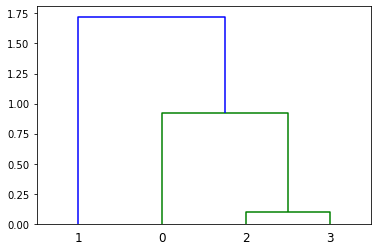

In [73]:
#dendogram for complete linkage
dend3 = shc.dendrogram(shc.linkage(initial, method='complete'))

In [74]:
#clusters formed at the end of each level for complete linkage
l1=[[2,3],[0,[2,3]],[1,[0,[2,3]]]]
l2=[0.10,0.85,1.74]
df2=pd.DataFrame(list(zip(l1,l2)))
print('For Complete Linkage')
df2=df2.rename(columns={0:'Clusters',1:'Value'})
print(df2)

For Complete Linkage
           Clusters  Value
0            [2, 3]   0.10
1       [0, [2, 3]]   0.85
2  [1, [0, [2, 3]]]   1.74


In [76]:
#combined dataframe
df=pd.concat([df1,df2],axis=1,sort=False)
print(df)

           Clusters  Value          Clusters  Value
0            [2, 3]    0.1            [2, 3]   0.10
1       [0, [2, 3]]    0.9       [0, [2, 3]]   0.85
2  [1, [0, [2, 3]]]    1.7  [1, [0, [2, 3]]]   1.74
